# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [3]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.020702
b    0.150938
c   -0.979108
d    0.862004
e    0.546506
dtype: float64
a         NaN
b    0.301875
c   -1.958216
d    1.724008
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2024,11,27,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 27 2024'
print(date)
# or alternatively
date = '27/11/2024 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2024-11-27
2024-11-27 10:45:10.000015
Nov 27 2024
27/11/2024 10:45:00
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-28 10:45:00',
               '2024-11-29 10:45:00', '2024-11-30 10:45:00',
               '2024-12-01 10:45:00', '2024-12-02 10:45:00',
               '2024-12-03 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 10:45:01',
               '2024-11-27 10:45:02', '2024-11-27 10:45:03',
               '2024-11-27 10:45:04', '2024-11-27 10:45:05',
               '2024-11-27 10:45:06', '2024-11-27 10:45:07',
               '2024-11-27 10:45:08', '2024-11-27 10:45:09',
               ...
               '2024-11-27 11:44:50', '2024-11-27 11:44:51',
               '2024-11-27 11:44:52', '2024-11-27 11:44:53',
               '2024-11-27 11:44:54', '2024-11-27 11:44:55',
               '2024-11-27 11:44:56', '2024-11-27 11:44:57',
               '2024-11-27 11:44:58', '2024-11-27 11:44:59'],
              dtype='datetime6

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)

1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2024-11-27':'2024-12-03'], '\n') # Note - includes end time


2024-11-27 10:45:00     9.749685
2024-11-28 10:45:00     9.532665
2024-11-29 10:45:00     9.240630
2024-11-30 10:45:00    11.740052
Freq: D, dtype: float64 

2024-11-27 10:45:00     9.749685
2024-11-28 10:45:00     9.532665
2024-11-29 10:45:00     9.240630
2024-11-30 10:45:00    11.740052
2024-12-01 10:45:00     9.763456
2024-12-02 10:45:00    11.868129
2024-12-03 10:45:00     9.264510
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index: (label of the rows: indexes, label of the columns: variables names)

In [10]:
entries=10
dates=pd.date_range('11/27/2024 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2024-11-27 10:45:00,-0.370110,-0.884693,-0.286761,-0.409810
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,-0.909974
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,0.996867
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,-0.243201
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,-0.418114
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,-1.257622
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,1.323529
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,0.219282
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,-0.720305
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,1.038721


or by means of a dictionary: (every column of a pandas dataframe is a panda series)


In [6]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2
# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2)

,A,B,C,D
2024-11-27 10:45:00,-0.370110,-0.884693,-0.286761,-0.409810
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,-0.909974


In [13]:
df.tail(4)

,A,B,C,D
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,1.323529
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,0.219282
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,-0.720305
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,1.038721


In [14]:
df.index

DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 11:45:00',
               '2024-11-27 12:45:00', '2024-11-27 13:45:00',
               '2024-11-27 14:45:00', '2024-11-27 15:45:00',
               '2024-11-27 16:45:00', '2024-11-27 17:45:00',
               '2024-11-27 18:45:00', '2024-11-27 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.37010961, -0.88469317, -0.28676148, -0.40980999],
       [ 1.3269746 , -0.92374549,  0.46044782, -0.90997416],
       [-0.58092133, -0.54909951, -0.95584691,  0.99686715],
       [ 0.13281992,  0.99919742, -1.00164467, -0.24320084],
       [ 0.67538404, -1.66346967,  0.72097604, -0.41811401],
       [ 1.26419332, -1.95100697, -0.08134487, -1.25762154],
       [-1.07073841,  1.18800806,  0.99335149,  1.32352918],
       [-0.08277689,  0.43112103, -0.57943706,  0.21928216],
       [ 1.24336801,  0.88903487, -1.18160398, -0.72030454],
       [-0.22343946,  0.13114398, -0.47886411,  1.0387209 ]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.231475,-0.233351,-0.239073,-0.038063
std,0.851188,1.123968,0.753808,0.893708
min,-1.070738,-1.951007,-1.181604,-1.257622
25%,-0.333442,-0.913982,-0.861744,-0.644757
50%,0.025022,-0.208978,-0.382813,-0.326505
75%,1.101372,0.774556,0.325000,0.802471
max,1.326975,1.188008,0.993351,1.323529


In [18]:
df.T

,2024-11-27 10:45:00,2024-11-27 11:45:00,2024-11-27 12:45:00,2024-11-27 13:45:00,2024-11-27 14:45:00,2024-11-27 15:45:00,2024-11-27 16:45:00,2024-11-27 17:45:00,2024-11-27 18:45:00,2024-11-27 19:45:00
A,-0.370110,1.326975,-0.580921,0.132820,0.675384,1.264193,-1.070738,-0.082777,1.243368,-0.223439
B,-0.884693,-0.923745,-0.549100,0.999197,-1.663470,-1.951007,1.188008,0.431121,0.889035,0.131144
C,-0.286761,0.460448,-0.955847,-1.001645,0.720976,-0.081345,0.993351,-0.579437,-1.181604,-0.478864
D,-0.409810,-0.909974,0.996867,-0.243201,-0.418114,-1.257622,1.323529,0.219282,-0.720305,1.038721


In [19]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2024-11-27 10:45:00,-0.370110,-0.884693,-0.286761,-0.409810
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,-0.909974
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,0.996867
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,-0.243201
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,-0.418114
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,-1.257622
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,1.323529
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,0.219282
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,-0.720305
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,1.038721


In [20]:
df.sort_values(by="C")

,A,B,C,D
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,-0.720305
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,-0.243201
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,0.996867
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,0.219282
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,1.038721
2024-11-27 10:45:00,-0.370110,-0.884693,-0.286761,-0.409810
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,-1.257622
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,-0.909974
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,-0.418114
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,1.323529


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2024-11-27 10:45:00   -0.370110
2024-11-27 11:45:00    1.326975
2024-11-27 12:45:00   -0.580921
2024-11-27 13:45:00    0.132820
2024-11-27 14:45:00    0.675384
2024-11-27 15:45:00    1.264193
2024-11-27 16:45:00   -1.070738
2024-11-27 17:45:00   -0.082777
2024-11-27 18:45:00    1.243368
2024-11-27 19:45:00   -0.223439
Freq: H, Name: A, dtype: float64 

2024-11-27 10:45:00   -0.370110
2024-11-27 11:45:00    1.326975
2024-11-27 12:45:00   -0.580921
2024-11-27 13:45:00    0.132820
2024-11-27 14:45:00    0.675384
2024-11-27 15:45:00    1.264193
2024-11-27 16:45:00   -1.070738
2024-11-27 17:45:00   -0.082777
2024-11-27 18:45:00    1.243368
2024-11-27 19:45:00   -0.223439
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2024-11-27 10:45:00":"2024-11-27 12:45:00"])

                            A         B         C         D
2024-11-27 10:45:00 -0.370110 -0.884693 -0.286761 -0.409810
2024-11-27 11:45:00  1.326975 -0.923745  0.460448 -0.909974
2024-11-27 12:45:00 -0.580921 -0.549100 -0.955847  0.996867
                            A         B         C         D
2024-11-27 10:45:00 -0.370110 -0.884693 -0.286761 -0.409810
2024-11-27 11:45:00  1.326975 -0.923745  0.460448 -0.909974
2024-11-27 12:45:00 -0.580921 -0.549100 -0.955847  0.996867


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.370110
B   -0.884693
C   -0.286761
D   -0.409810
Name: 2024-11-27 10:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2024-11-27 10:45:00,-0.370110,-0.884693
2024-11-27 11:45:00,1.326975,-0.923745
2024-11-27 12:45:00,-0.580921,-0.549100
2024-11-27 13:45:00,0.132820,0.999197
2024-11-27 14:45:00,0.675384,-1.663470
2024-11-27 15:45:00,1.264193,-1.951007
2024-11-27 16:45:00,-1.070738,1.188008
2024-11-27 17:45:00,-0.082777,0.431121
2024-11-27 18:45:00,1.243368,0.889035
2024-11-27 19:45:00,-0.223439,0.131144


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2024-11-27 14:45:00':'2024-11-27 16:45:00',['A','B']]

,A,B
2024-11-27 14:45:00,0.675384,-1.663470
2024-11-27 15:45:00,1.264193,-1.951007
2024-11-27 16:45:00,-1.070738,1.188008


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.326974598691565
1.326974598691565


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.132820
B    0.999197
C   -1.001645
D   -0.243201
Name: 2024-11-27 13:45:00, dtype: float64 

                            A         B
2024-11-27 13:45:00  0.132820  0.999197
2024-11-27 14:45:00  0.675384 -1.663470


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2024-11-27 11:45:00,1.326975,0.460448
2024-11-27 12:45:00,-0.580921,-0.955847
2024-11-27 14:45:00,0.675384,0.720976


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

                            A         B         C         D
2024-11-27 11:45:00  1.326975 -0.923745  0.460448 -0.909974
2024-11-27 12:45:00 -0.580921 -0.549100 -0.955847  0.996867 

                            B         C
2024-11-27 10:45:00 -0.884693 -0.286761
2024-11-27 11:45:00 -0.923745  0.460448
2024-11-27 12:45:00 -0.549100 -0.955847
2024-11-27 13:45:00  0.999197 -1.001645
2024-11-27 14:45:00 -1.663470  0.720976
2024-11-27 15:45:00 -1.951007 -0.081345
2024-11-27 16:45:00  1.188008  0.993351
2024-11-27 17:45:00  0.431121 -0.579437
2024-11-27 18:45:00  0.889035 -1.181604
2024-11-27 19:45:00  0.131144 -0.478864
-0.9237454949395089


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [30]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,-0.243201
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,1.323529
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,0.219282
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,-0.720305
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,1.038721


In [31]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2024-11-27 10:45:00,NaN,NaN,NaN,NaN
2024-11-27 11:45:00,1.326975,NaN,0.460448,NaN
2024-11-27 12:45:00,NaN,NaN,NaN,0.996867
2024-11-27 13:45:00,0.132820,0.999197,NaN,NaN
2024-11-27 14:45:00,0.675384,NaN,0.720976,NaN
2024-11-27 15:45:00,1.264193,NaN,NaN,NaN
2024-11-27 16:45:00,NaN,1.188008,0.993351,1.323529
2024-11-27 17:45:00,NaN,0.431121,NaN,0.219282
2024-11-27 18:45:00,1.243368,0.889035,NaN,NaN
2024-11-27 19:45:00,NaN,0.131144,NaN,1.038721


### Setting

Combination of selection and setting of values

In [32]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,5,0.0,0
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,5,0.5,2
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,5,1.0,4
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,5,1.5,6
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,5,2.0,8
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,5,2.5,10
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,5,3.0,12
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,5,3.5,14
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,5,4.0,16
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,5,4.5,18


In [33]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,5,0.0,0,1.000000
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,5,0.5,2,0.999962
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,5,1.0,4,0.999848
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,5,1.5,6,0.999657
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,5,2.0,8,0.999391
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,5,2.5,10,0.999048
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,5,3.0,12,0.998630
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,5,3.5,14,0.998135
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,5,4.0,16,0.997564
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,5,4.5,18,0.996917


In [34]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,-5,0.0,0,-1.000000
2024-11-27 11:45:00,-1.326975,-0.923745,-0.460448,-5,-0.5,-2,-0.999962
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,-5,-1.0,-4,-0.999848
2024-11-27 13:45:00,-0.132820,-0.999197,-1.001645,-5,-1.5,-6,-0.999657
2024-11-27 14:45:00,-0.675384,-1.663470,-0.720976,-5,-2.0,-8,-0.999391
2024-11-27 15:45:00,-1.264193,-1.951007,-0.081345,-5,-2.5,-10,-0.999048
2024-11-27 16:45:00,-1.070738,-1.188008,-0.993351,-5,-3.0,-12,-0.998630
2024-11-27 17:45:00,-0.082777,-0.431121,-0.579437,-5,-3.5,-14,-0.998135
2024-11-27 18:45:00,-1.243368,-0.889035,-1.181604,-5,-4.0,-16,-0.997564
2024-11-27 19:45:00,-0.223439,-0.131144,-0.478864,-5,-4.5,-18,-0.996917


### Are you dealing with a Copy or a View?

In general is hard to tell..

In [35]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd)

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)



     a  b
0  100  4
1    2  5
2    3  6
     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `dfd["a"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [1]:
dfd["a"][dfd["b"] > 5] = 100
dfd

NameError: name 'dfd' is not defined

With copy on write this can be done by using `loc`

In [37]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

,a,b
0,100,4
1,2,5
2,200,6


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,5,0.0,1.000000
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,5,0.5,0.999962
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,5,1.0,0.999848
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,5,1.5,0.999657
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,5,2.0,0.999391
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,5,2.5,0.999048
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,5,3.0,0.998630
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,5,3.5,0.998135
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,5,4.0,0.997564
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,5,4.5,0.996917


In [39]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,5,0.0,0,1.000000
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,5,2.5,10,0.999048
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,5,3.0,12,0.998630
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,5,3.5,14,0.998135
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,5,4.0,16,0.997564
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,5,4.5,18,0.996917


In [40]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,5,0.0,0,1.000000
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,5,0.5,2,0.999962
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,5,1.0,4,0.999848
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,5,1.5,6,0.999657
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,5,2.0,8,0.999391
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,5,2.5,10,0.999048
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,5,3.0,12,0.998630
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,5,3.5,14,0.998135
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,5,4.0,16,0.997564
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,5,4.5,18,0.996917


In [41]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2024-11-27 18:45:00"))

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,5,0.0,0,1.000000
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,5,0.5,2,0.999962
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,5,1.0,4,0.999848
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,5,1.5,6,0.999657
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,5,2.0,8,0.999391
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,5,2.5,10,0.999048
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,5,3.0,12,0.998630
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,5,3.5,14,0.998135
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [42]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2024-11-27 11:45:00,1.326975,NaN,0.460448,5,0.5,2.0,0.999962
2024-11-27 12:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2024-11-27 13:45:00,0.132820,0.999197,NaN,5,1.5,6.0,0.999657
2024-11-27 14:45:00,0.675384,NaN,0.720976,5,2.0,8.0,0.999391
2024-11-27 15:45:00,1.264193,NaN,NaN,5,2.5,10.0,0.999048
2024-11-27 16:45:00,NaN,1.188008,0.993351,5,3.0,12.0,0.998630
2024-11-27 17:45:00,NaN,0.431121,NaN,5,3.5,14.0,0.998135
2024-11-27 18:45:00,1.243368,0.889035,NaN,5,4.0,16.0,0.997564
2024-11-27 19:45:00,NaN,0.131144,NaN,5,4.5,18.0,0.996917


In [43]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [44]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,True,True,True,False,True,True,False
2024-11-27 11:45:00,False,True,False,False,False,False,False
2024-11-27 12:45:00,True,True,True,False,False,False,False
2024-11-27 13:45:00,False,False,True,False,False,False,False
2024-11-27 14:45:00,False,True,False,False,False,False,False
2024-11-27 15:45:00,False,True,True,False,False,False,False
2024-11-27 16:45:00,True,False,False,False,False,False,False
2024-11-27 17:45:00,True,False,True,False,False,False,False
2024-11-27 18:45:00,False,False,True,False,False,False,False
2024-11-27 19:45:00,True,False,True,False,False,False,False


In [45]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2024-11-27 11:45:00,1.326975,0.000000,0.460448,5,0.5,2.0,0.999962
2024-11-27 12:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2024-11-27 13:45:00,0.132820,0.999197,0.000000,5,1.5,6.0,0.999657
2024-11-27 14:45:00,0.675384,0.000000,0.720976,5,2.0,8.0,0.999391
2024-11-27 15:45:00,1.264193,0.000000,0.000000,5,2.5,10.0,0.999048
2024-11-27 16:45:00,0.000000,1.188008,0.993351,5,3.0,12.0,0.998630
2024-11-27 17:45:00,0.000000,0.431121,0.000000,5,3.5,14.0,0.998135
2024-11-27 18:45:00,1.243368,0.889035,0.000000,5,4.0,16.0,0.997564
2024-11-27 19:45:00,0.000000,0.131144,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [46]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2024-11-27 11:45:00,1.326975,NaN,0.460448,5,0.5,2.0,0.999962
2024-11-27 12:45:00,1.326975,NaN,0.460448,5,1.0,4.0,0.999848
2024-11-27 13:45:00,0.132820,0.999197,0.460448,5,1.5,6.0,0.999657
2024-11-27 14:45:00,0.675384,0.999197,0.720976,5,2.0,8.0,0.999391
2024-11-27 15:45:00,1.264193,0.999197,0.720976,5,2.5,10.0,0.999048
2024-11-27 16:45:00,1.264193,1.188008,0.993351,5,3.0,12.0,0.998630
2024-11-27 17:45:00,1.264193,0.431121,0.993351,5,3.5,14.0,0.998135
2024-11-27 18:45:00,1.243368,0.889035,0.993351,5,4.0,16.0,0.997564
2024-11-27 19:45:00,1.243368,0.131144,0.993351,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [47]:
# Some statistics (mean() just as an example)
# rows
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.268486
B         -0.233351
C         -0.239073
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2024-11-27 10:45:00    0.689792
2024-11-27 11:45:00    1.337663
2024-11-27 12:45:00    1.273426
2024-11-27 13:45:00    1.947147
2024-11-27 14:45:00    2.247469
2024-11-27 15:45:00    2.532984
2024-11-27 16:45:00    3.158464
2024-11-27 17:45:00    3.323863
2024-11-27 18:45:00    3.849766
2024-11-27 19:45:00    3.989394
Freq: H, dtype: float64 



In [48]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,5,0.0,0,1.000000
2024-11-27 11:45:00,1.326975,-1.808439,0.173686,10,0.5,2,1.999962
2024-11-27 12:45:00,0.746053,-2.357538,-0.782161,15,1.5,6,2.999810
2024-11-27 13:45:00,0.878873,-1.358341,-1.783805,20,3.0,12,3.999467
2024-11-27 14:45:00,1.554257,-3.021810,-1.062829,25,5.0,20,4.998858
2024-11-27 15:45:00,2.818451,-4.972817,-1.144174,30,7.5,30,5.997906
2024-11-27 16:45:00,1.747712,-3.784809,-0.150823,35,10.5,42,6.996536
2024-11-27 17:45:00,1.664935,-3.353688,-0.730260,40,14.0,56,7.994670
2024-11-27 18:45:00,2.908303,-2.464653,-1.911864,45,18.0,72,8.992234
2024-11-27 19:45:00,2.684864,-2.333509,-2.390728,50,22.5,90,9.989152


In [49]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.884693,-0.286761,5,0.0,0,1.000000
2024-11-27 11:45:00,1.326975,-0.923745,0.460448,5,0.5,2,0.999962
2024-11-27 12:45:00,-0.580921,-0.549100,-0.955847,5,1.0,4,0.999848
2024-11-27 13:45:00,0.132820,0.999197,-1.001645,5,1.5,6,0.999657
2024-11-27 14:45:00,0.675384,-1.663470,0.720976,5,2.0,8,0.999391
2024-11-27 15:45:00,1.264193,-1.951007,-0.081345,5,2.5,10,0.999048
2024-11-27 16:45:00,-1.070738,1.188008,0.993351,5,3.0,12,0.998630
2024-11-27 17:45:00,-0.082777,0.431121,-0.579437,5,3.5,14,0.998135
2024-11-27 18:45:00,1.243368,0.889035,-1.181604,5,4.0,16,0.997564
2024-11-27 19:45:00,-0.223439,0.131144,-0.478864,5,4.5,18,0.996917


In [50]:
df.apply(lambda x: x.max() - x.min())

A           2.397713
B           3.139015
C           2.174955
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [51]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2024-11-27 10:45:00   -0.884693
2024-11-27 11:45:00    0.403229
2024-11-27 12:45:00   -1.130021
2024-11-27 13:45:00    1.132017
2024-11-27 14:45:00   -0.988086
2024-11-27 15:45:00   -0.686814
2024-11-27 16:45:00    0.117270
2024-11-27 17:45:00    0.348344
2024-11-27 18:45:00    2.132403
2024-11-27 19:45:00   -0.092295
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [52]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [53]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [54]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
5          69053.333333
6          69311.666667
7          69400.000000
8          69367.500000
9          69705.833333
10         69628.333333
11         69665.833333
12         69815.000000
13         69794.166667
14         69727.500000
15         69925.000000
16         69686.666667
17         69758.333333
18         69878.333333
19         69921.666667
20         69736.666667
21         69733.333333
22         69769.166667
23         69987.500000
24         69890.833333
25         69936.666667
26         69986.666667
27         77042.500000
28         77025.833333
29         77091.666667
               ...     
1310690    87929.166667
1310691    87917.500000
1310692    87905.833333
1310693    88036.666667
1310694    88112.500000
1310695    88195.000000
1310696    88151.666667
1310697    88127.500000
1310698      232.500000
1310699      298.333333
1310700      246

In [55]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [56]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.186789,0.373593,1.081280,-0.105897
1,-1.365970,0.937422,-0.250909,-0.145149
2,-1.187700,-0.965411,-1.481345,1.491870
3,0.551082,-0.526507,0.133318,0.216291
4,0.575731,-1.380863,-1.516495,1.939037
5,-0.486270,-0.828940,1.967463,1.017461
6,-0.011111,1.410571,0.763830,-1.093232
7,1.406212,1.040330,0.123930,-0.611007
8,0.406879,0.478633,-0.802692,-0.079243
9,-0.248199,-0.000894,0.019311,0.170036


In [57]:
# divide it into pieaces row-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.186789  0.373593  1.081280 -0.105897
 1 -1.365970  0.937422 -0.250909 -0.145149
 2 -1.187700 -0.965411 -1.481345  1.491870,
           0         1         2         3
 3  0.551082 -0.526507  0.133318  0.216291
 4  0.575731 -1.380863 -1.516495  1.939037
 5 -0.486270 -0.828940  1.967463  1.017461
 6 -0.011111  1.410571  0.763830 -1.093232,
           0         1         2         3
 7  1.406212  1.040330  0.123930 -0.611007
 8  0.406879  0.478633 -0.802692 -0.079243
 9 -0.248199 -0.000894  0.019311  0.170036]

In [58]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.186789,0.373593,1.081280,-0.105897
1,-1.365970,0.937422,-0.250909,-0.145149
2,-1.187700,-0.965411,-1.481345,1.491870
3,0.551082,-0.526507,0.133318,0.216291
4,0.575731,-1.380863,-1.516495,1.939037
5,-0.486270,-0.828940,1.967463,1.017461
6,-0.011111,1.410571,0.763830,-1.093232
7,1.406212,1.040330,0.123930,-0.611007
8,0.406879,0.478633,-0.802692,-0.079243
9,-0.248199,-0.000894,0.019311,0.170036


In [59]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,-0.186789,0.373593,1.081280,-0.105897
1,-1.365970,0.937422,-0.250909,-0.145149
2,-1.187700,-0.965411,-1.481345,1.491870
3,0.551082,-0.526507,0.133318,0.216291
4,0.575731,-1.380863,-1.516495,1.939037
5,-0.486270,-0.828940,1.967463,1.017461
6,-0.011111,1.410571,0.763830,-1.093232
7,1.406212,1.040330,0.123930,-0.611007
8,0.406879,0.478633,-0.802692,-0.079243
9,-0.248199,-0.000894,0.019311,0.170036


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [60]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [61]:
result = pd.merge(df1, df2, on='id', how='left')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [62]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [63]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


      name   age
1    Alice   NaN
2      Bob  25.0
3  Charlie  30.0


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [64]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


          Values
Category        
A             90
B             60
C             60


In [65]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values     
            sum mean
Category            
A            90   30
B            60   30
C            60   60


In [66]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)


               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [67]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

  Category Type  Values  Group_Avg
0        A    X      10         15
1        A    Y      20         15
2        B    X      30         35
3        B    Y      40         35
4        C    X      50         55
5        C    Y      60         55


In [68]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

  Category Type  Values  Group_Avg
2        B    X      30         35
3        B    Y      40         35
4        C    X      50         55
5        C    Y      60         55


In [69]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

          Sum  Max  Count
Category                 
A          30   20      2
B          70   40      2
C         110   60      2


In [70]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


Group: A
  Category Type  Values  Group_Avg
0        A    X      10         15
1        A    Y      20         15
Group: B
  Category Type  Values  Group_Avg
2        B    X      30         35
3        B    Y      40         35
Group: C
  Category Type  Values  Group_Avg
4        C    X      50         55
5        C    Y      60         55


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [76]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -1.337826
       two      -0.012706
baz    one       0.869267
       two       0.382514
foo    one      -0.998179
       two       0.840403
qux    one       0.814907
       two       0.398912
dtype: float64


In [72]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.282719  0.705916
    three -1.260587  0.039624
    two   -0.544788 -1.093864
foo one    0.175860 -0.032117
    three  0.643483  0.088378
    two    2.246152 -2.050960

In [73]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.282719
            D    0.705916
     three  C   -1.260587
            D    0.039624
     two    C   -0.544788
            D   -1.093864
foo  one    C    0.175860
            D   -0.032117
     three  C    0.643483
            D    0.088378
     two    C    2.246152
            D   -2.050960
dtype: float64

## Plotting

Just a preview, more on the next lab class!

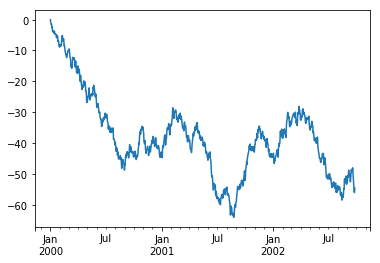

In [77]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

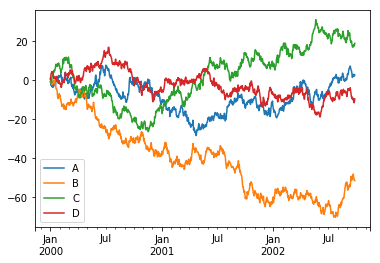

In [75]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')